**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [159]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

Import Dataset

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/feliciastevany/DataMiningW2/refs/heads/main/Bank.csv', delimiter=';') # Read the csv dataset
df.sample(10) # Showing 10 random sample rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2110,31,blue-collar,married,secondary,no,-498,yes,no,cellular,21,jul,357,1,-1,0,unknown,no
3221,31,technician,married,secondary,no,0,no,yes,cellular,19,aug,144,4,-1,0,unknown,no
2000,28,blue-collar,married,primary,no,60,yes,no,cellular,6,may,161,1,337,1,failure,no
2879,61,housemaid,married,primary,no,848,no,no,cellular,27,apr,605,1,187,1,other,no
2519,43,technician,single,tertiary,yes,0,no,no,cellular,29,aug,73,4,-1,0,unknown,no
358,48,admin.,divorced,secondary,no,4099,no,no,cellular,2,apr,397,2,-1,0,unknown,yes
3742,37,self-employed,married,tertiary,no,137,no,no,cellular,13,aug,244,6,-1,0,unknown,no
2287,38,unemployed,married,tertiary,no,1449,no,no,unknown,26,may,535,6,-1,0,unknown,no
2710,44,services,divorced,secondary,no,0,yes,no,unknown,4,jun,389,5,-1,0,unknown,no
528,43,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




Column Information

In [161]:
df.info() # Showing the info of all the column including datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Column Description

In [162]:
description = df.describe()
description # Showing the description of the column

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Change the "admin" and "management" value in job column

In [163]:
# Change the values in the 'job' column if they are 'admin' or 'management'
df.loc[df['job'].isin(['admin', 'management']), 'job'] = 'admin_management'

# Check the unique values in the 'job' column to verify the change
print(df['job'].unique())

['unemployed' 'services' 'admin_management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


Unique Values for categorical columm (target column 'y')

In [164]:
print(df['y'].value_counts(dropna=False))

y
no     4000
yes     521
Name: count, dtype: int64


Check the 'unknown' value

In [165]:
for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")

# The result shows that there are 4 columns with 'unknown' values in the dataset.
# This will not affect my result because I only use duration, pdays, and poutcome for my X.

Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


Encode Categorical Columns

In [166]:
encoder = LabelEncoder() # create a LabelEncoder to encode the categorical columns

columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Loop over each column and apply the encoder
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column].astype(str))

df.head() # showing the first 5 encoded columns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,1,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,1,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,2,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


Encode Target Columns ('y')

In [167]:
# apply label encoding to the target column (y)
df['y'] = encoder.fit_transform(df['y'])

df.sample(5) # showing the random encoded columns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
686,47,1,1,2,0,7708,1,0,0,21,9,157,5,-1,0,3,0
2464,23,9,2,2,0,1129,1,0,2,28,8,806,1,-1,0,3,1
3092,46,1,1,2,0,523,1,0,0,6,8,105,4,366,2,0,0
2842,48,1,1,0,0,3230,1,0,1,20,9,207,3,-1,0,3,0
2963,31,1,2,2,0,12569,0,0,0,9,11,344,1,295,1,0,1


Heatmap

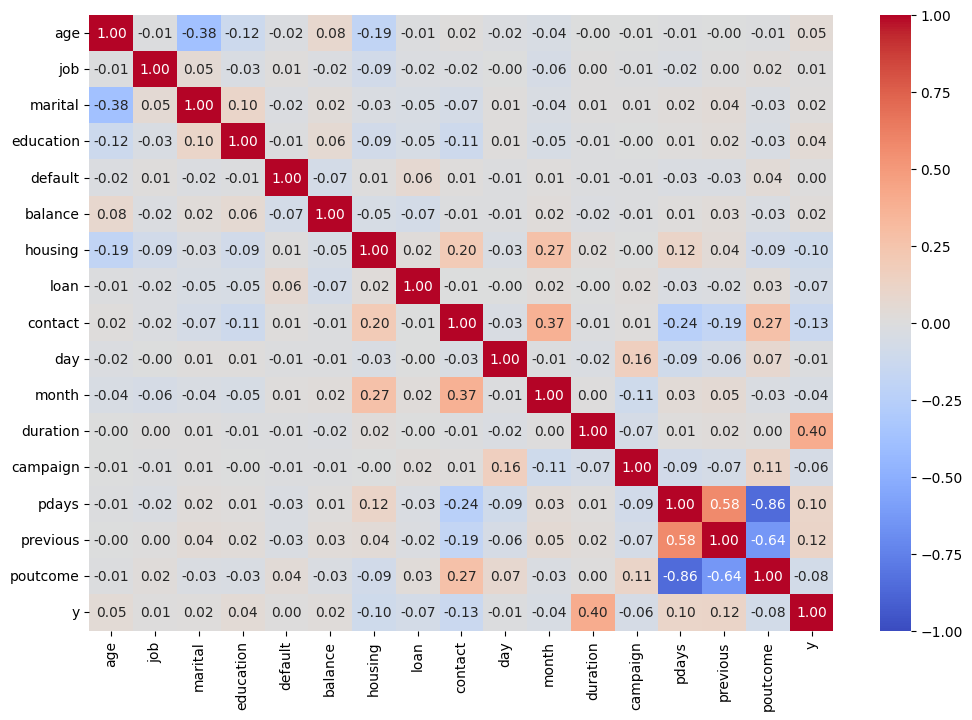

In [168]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('')

plt.show() #Showing the heatmap result

# Result
# The correlation heatmap above visualizes the relationships between different attributes in the dataset. "duration" has the strongest positive correlation with the
# target variable "y" (0.40), suggesting that the length of time a customer has been in contact during the campaign is the most influential factor for predicting
# the target outcome. This insight implies that "duration" could be a significant predictor in models aiming to determine the likelihood of a positive response.

## Machine Learning (Split Data)

Splitting X and Y

In [169]:
# X is the predicting variable, and y is the predicted variable (target)
# Using duration, pdays, and poutcome as the X because it's most relatable
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']

Balancing data using SMOTEEN

In [170]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X, y = smoteenn.fit_resample(X, y)

print("Class distribution by using SMOTEEN:")
print(y.value_counts())

# After using the SMOTEEN, total count of no value is much lower and the yes value is much higher than the usual data

Class distribution by using SMOTEEN:
y
0    2890
1    2172
Name: count, dtype: int64


Split data into training and test set (test size 20% and random state 42)

In [171]:
# Splitting the data to traning and test using train test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% training data and 20% testing data

Check the shape of X_train and X_test

In [172]:
# Checking how many rows and columns in each train and test data
X_train.shape, X_test.shape

((4049, 3), (1013, 3))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

Define the model

In [173]:
# Modelling using Random Forest with estimators 100 times and random state 42
clf_rf = RandomForestClassifier(random_state=42, n_estimators=100)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict the test set results

In [174]:
# Predict X-test with random forest model
y_pred_rf = clf_rf.predict(X_test)

Check Accuracy Score

In [175]:
# Accuracy score using y_test and y_pred
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy score with Random Forest: {accuracy_rf * 100:.2f}%") # Showing accuracy score using y_test and y_pred

Accuracy score with Random Forest: 99.01%


Check overfitting and underfitting

In [176]:
y_train_rf = clf_rf.predict(X_train)

# Accuracy for test and train using random forest model
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
training_accuracy_rf = accuracy_score(y_train, y_train_rf)

# Showing testing and training accuracy based on train and test data
print(f"Testing accuracy: {test_accuracy_rf * 100:.2f}%")
print(f"Training accuracy: {training_accuracy_rf * 100:.2f}%")

# Result
# The model is well-fitted because the different between testing and training result is under 1%.

Testing accuracy: 99.01%
Training accuracy: 100.00%


Confusion Matrix

In [177]:
# Confusion matrix of random forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Random Forest:\n", cm_rf)

Confusion Matrix Random Forest:
 [[590   8]
 [  2 413]]


Classification Report

In [178]:
# Classification report of random forest model
clf_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", clf_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       598
           1       0.98      1.00      0.99       415

    accuracy                           0.99      1013
   macro avg       0.99      0.99      0.99      1013
weighted avg       0.99      0.99      0.99      1013



Results and Conclusion

In [179]:
# The results shows that this model, using the relevant variables, performs exceptionally well. The accuracy scores of 99% on testing data and 100% on training data
# highlight its strong predictive power and reliability. These high accuracy scores indicate that the model has effectively captured the underlying patterns in the
# data, making it an excellent choice for this task.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

Define the model

In [180]:
# Modelling using Gradient Boosting Classifier model
clf_gb = GradientBoostingClassifier(criterion='friedman_mse', max_depth=3, random_state=0, n_estimators=100, learning_rate=0.1)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

Predict the test set results

In [181]:
# Predict X-test with Gradient Boosting Classifier model
y_pred_gb = clf_gb.predict(X_test)

Check Accuracy Score

In [182]:
# Accuracy score using y_test and y_pred
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Model accuracy score with Gradient Boosting Classifier: {accuracy_gb * 100:.2f}%") # Showing accuracy score using y_test and y_pred

Model accuracy score with Gradient Boosting Classifier: 97.83%


Check overfitting and underfitting

In [183]:
y_train_gb = clf_gb.predict(X_train)

# Accuracy for test and train using Gradient Boosting Classifier model
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
training_accuracy_gb = accuracy_score(y_train, y_train_gb)

# Showing testing and training accuracy based on train and test data
print(f"Testing accuracy: {test_accuracy_gb * 100:.2f}%")
print(f"Training accuracy: {training_accuracy_gb * 100:.2f}%")

# Result
# The model is well-fitted because the different between testing and training result is under 1%.

Testing accuracy: 97.83%
Training accuracy: 98.57%


Confusion Matrix

In [184]:
# Confusion matrix of Gradient Boosting Classifier model
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Confusion Matrix Gradient Boosting Classifier:\n", cm_gb)

Confusion Matrix Gradient Boosting Classifier:
 [[582  16]
 [  6 409]]


Classification Report

In [185]:
# Classification report of Gradient Boosting Classifier model
clf_report_gb = classification_report(y_test, y_pred_gb)

print("Classification Report Gradient Boosting Classifier: \n", clf_report_gb)

Classification Report Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       598
           1       0.96      0.99      0.97       415

    accuracy                           0.98      1013
   macro avg       0.98      0.98      0.98      1013
weighted avg       0.98      0.98      0.98      1013



Results and Conclusion

In [186]:
# The result achieved a strong performance, with an accuracy score of 97.83%. This high accuracy indicates that
# the model is highly effective at correctly classifying instances in this binary classification task. With balanced
# performance across classes, the model handles both categories well.